# ODEV 3 EK

# Adı: Ahmet Ali Tilkicioğlu

# No: 210102002163


# SORU 1

In [1]:
import numpy as np # Bütün kütüphane tanımlamaları burada yapıldı
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fftpack import fft , ifft
%matplotlib inline

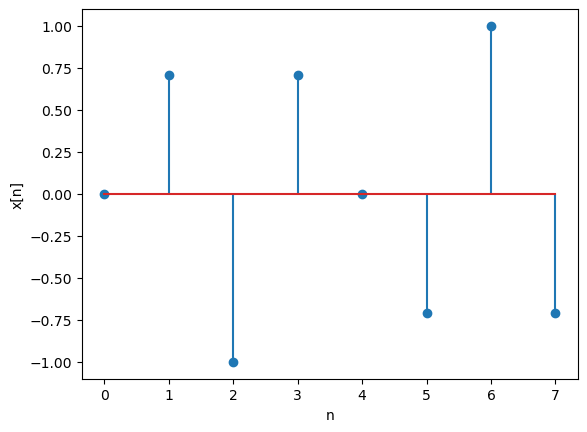

In [2]:
x = [0, 0.707106,-1,0.707106,0,-0.707106,1,-0.707106]
n = np.arange(8)
plt.stem(n,x)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

Text(0.5, 1.0, '$\\frac{1}{N}\\measuredangle X(e^{j\\omega})(\\times\\pi)=\\measuredangle a_k(\\times \\pi)$')

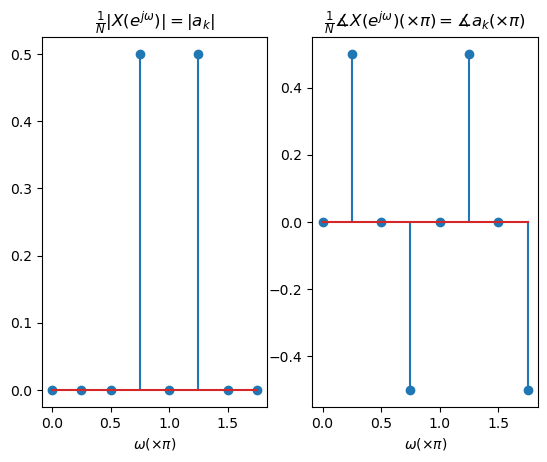

In [3]:

N=len(x) 
n=np.arange(0,8) 
w_disc=n*2*np.pi/N # 0-2pi arasında(2pi noktası dahil değil)
X_abs=np.abs(fft(x)/N) 
X_phase=np.angle(fft(x)/N) 
plt.subplot(121) 
plt.stem(w_disc/np.pi,X_abs) 
plt.xlabel('$\omega (\\times \pi)$') 
plt.title('$\\frac{1}{N}|X(e^{j\omega})|=|a_{k}|$') 
plt.subplot(122) 
plt.stem(w_disc/np.pi,X_phase/np.pi) 
plt.xlabel('$\omega (\\times \pi)$') 
plt.title('$\\frac{1}{N}\measuredangle X(e^{j\omega})(\\times\pi)=\measuredangle a_k(\\times \pi)$') 


In [4]:
print(X_phase/np.pi)

[-0.   0.5 -0.  -0.5 -0.   0.5  0.  -0.5]


In [5]:
print(X_abs)

[0.00000000e+00 2.76191153e-07 0.00000000e+00 4.99999724e-01
 0.00000000e+00 4.99999724e-01 0.00000000e+00 2.76191153e-07]


# a3 = |a3|e^j<a3 = 0.5e^-j0.5*pi
# a5 = |a5|e^j<a5 = 0.5e^j0.5*pi
# N = 8
# Sentez = a3*e^6/8*n*pi + a3*e^10/8*n*pi
#        = 0.5e^j(3/4*pi*n - pi/2) + 0.5e^-j(3/4*pi*n - pi/2) 
#        = cos(3/4*pi*n - pi/2)

# A = 1, Faz = -pi/2, w = 3/4*pi

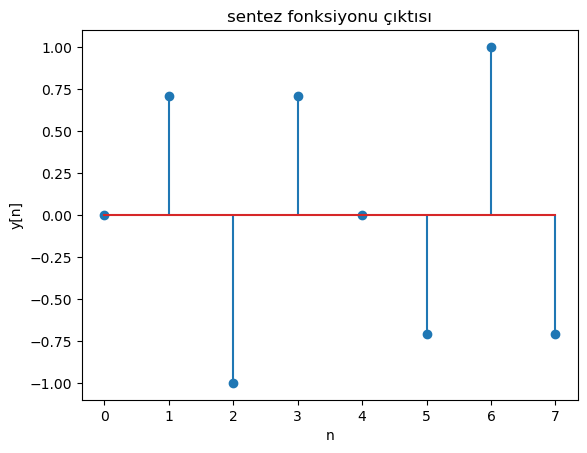

In [6]:
y_func = np.cos(0.75*np.pi*n - np.pi/2) #sentez fonksiyonu
plt.stem(n,y_func)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('sentez fonksiyonu çıktısı')
plt.show()

# Fonksiyounmuz ilk işaret ile aynı çıkmıştır.

# SORU 2

# ℎ[𝑛] = 𝛿[𝑛] −𝛿[𝑛 −1]

# h[n] ---- Fourier --> H(e^jw)

# H(e^jw) = 1 - e^-jw

# H(e^jw)    = 2e^j(𝜋 /2-w)sin(w/2)

# Genlik = | 2sin(w/2)| Faz = pi/2-w/2

# olarak el ile çözülmüştür.

In [7]:
n=np.arange(0,11)
dirac_n = np.array([0 if i!=0 else 1 for i in n])
dirac_n_eksi_1 = np.array([0 if i!=1 else 1 for i in n])
h = dirac_n - dirac_n_eksi_1

fft_H=fft(h) #fast fourier transformu alındı
abs_fft_H=np.abs(fft_H)
phase_fft_H=np.angle(fft_H)

print(abs_fft_H)


[0.         0.56346511 1.08128163 1.51149915 1.81926399 1.97964288
 1.97964288 1.81926399 1.51149915 1.08128163 0.56346511]


In [8]:
print(phase_fft_H)

[-0.          1.28519699  0.99959766  0.71399833  0.428399    0.14279967
 -0.14279967 -0.428399   -0.71399833 -0.99959766 -1.28519699]


In [9]:
y = np.zeros(11)
for i in n:
    y[i] = abs_fft_H[i]*np.cos((np.pi*i/3) + phase_fft_H[i]) #gesaplanan genlik ve fazla sisteme uygulanır.

print(y)
    

[ 0.         -0.38883545 -1.08005691 -1.14231484 -0.17293204  1.22373404
  1.95949297  1.4819287   0.28605309 -0.58458499 -0.54758192]


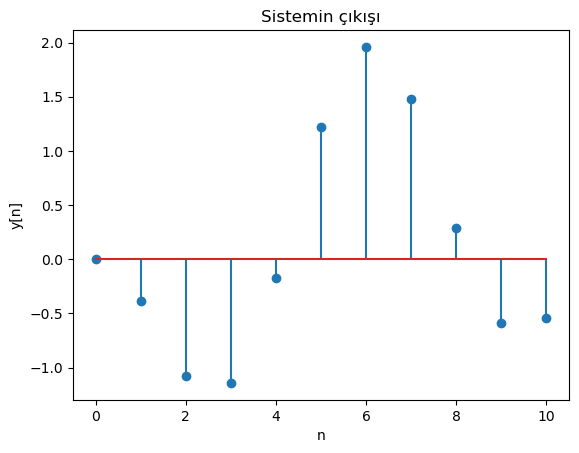

In [10]:
plt.figure()
plt.stem(n,y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('Sistemin çıkışı')
plt.show()